In [26]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from queens import *
from IPython.display import clear_output, display
import json
import re
import os

def draw_dump(dump_path, output_path, group_map):
    timestr = time.strftime("%Y%m%d-%H-%M-%S")
    for dumpfile in os.listdir(dump_path):
        if '.json' in dumpfile:        
            with open(f'{dump_path}\\{dumpfile}', 'r') as f:
                dump = json.load(f)
            board = Board(group_map, dump)
            ax = board.draw(cell_output=False)
            ax.set_title(dumpfile.split('.')[0])
            output_fn = dumpfile.replace('.json', f'_{timestr}.png')
            print(output_fn)       
            ax.figure.savefig(f'{output_path}\\{output_fn}')
    return  

dump_path = '.\\dump'
images_path = '.\\images'

with open('queens_board.json', 'r') as f:
    loaded_board = json.load(f)
board = Board(loaded_board)
game = Game(board)

In [27]:
game.play(max_step=10)
draw_dump(dump_path, images_path, loaded_board)

step 2: place at (1, 8), next move number: 48
step 3: place at (2, 6), next move number: 34
step 4: place at (4, 7), next move number: 24
step 5: place at (5, 5), next move number: 15
step 6: place at (6, 2), next move number: 7
step 7: place at (3, 3), next move number: 3
step 8: place at (8, 1), next move number: 0
game stuck, reverting the board
step 9: place at (7, 4), next move number: 2
step 10: place at (3, 1), next move number: 0
game stuck, reverting the board
step 11: place at (3, 3), next move number: 3
steps_10_dump_20251110-11-57-58.png
steps_10_dump_stuck_20251110-11-57-58.png
steps_11_dump_20251110-11-57-58.png
steps_10_dump_stuck_20251110-11-57-58.png
steps_11_dump_20251110-11-57-58.png
steps_2_dump_20251110-11-57-58.png
steps_3_dump_20251110-11-57-58.png
steps_2_dump_20251110-11-57-58.png
steps_3_dump_20251110-11-57-58.png
steps_4_dump_20251110-11-57-58.png
steps_4_dump_20251110-11-57-58.png
steps_5_dump_20251110-11-57-58.png
steps_6_dump_20251110-11-57-58.png
steps_5_

In [5]:
for r in board.grid:
    for c in r:
        print(c, end=',')
    print('\b ')

pos:(1, 1), group:0, value:0,pos:(2, 1), group:0, value:0,pos:(3, 1), group:0, value:0,pos:(4, 1), group:0, value:0,pos:(5, 1), group:0, value:0,pos:(6, 1), group:0, value:0,pos:(7, 1), group:1, value:0,pos:(8, 1), group:1, value:0 
pos:(1, 2), group:0, value:0,pos:(2, 2), group:0, value:0,pos:(3, 2), group:0, value:0,pos:(4, 2), group:0, value:0,pos:(5, 2), group:0, value:0,pos:(6, 2), group:2, value:0,pos:(7, 2), group:2, value:0,pos:(8, 2), group:2, value:0 
pos:(1, 3), group:0, value:0,pos:(2, 3), group:0, value:0,pos:(3, 3), group:0, value:0,pos:(4, 3), group:0, value:0,pos:(5, 3), group:3, value:0,pos:(6, 3), group:2, value:0,pos:(7, 3), group:2, value:0,pos:(8, 3), group:2, value:0 
pos:(1, 4), group:0, value:0,pos:(2, 4), group:4, value:0,pos:(3, 4), group:5, value:0,pos:(4, 4), group:5, value:0,pos:(5, 4), group:2, value:0,pos:(6, 4), group:2, value:0,pos:(7, 4), group:2, value:0,pos:(8, 4), group:2, value:0 
pos:(1, 5), group:0, value:0,pos:(2, 5), group:5, value:0,pos:(3, 5)

In [6]:
groups = [['a', 'b', 'c'], [], ['d', 'e'], ['f']]
groups_ind = list(range(len(groups)))
print(groups_ind)
groups_ind.sort(key=lambda x:len(groups[x]))
print(groups_ind)

[0, 1, 2, 3]
[1, 3, 2, 0]


In [ ]:
class Cell:
    def __init__(self, group, pos):
        self.value = 0 # 0: empty, 1: placed, 2: occupied
        self.group = group
        self.pos = pos
    def __repr__(self):
        return f'pos:{self.pos}, group:{self.group}, value:{self.value}'

class Node:
    def __init__(self, cell, board):
        self.prev_node = None
        self.next_nodes = []
        self.cell = cell
        self.board = board
        pass
      

class Board:
    def __init__(self, group_map):
        self.group_map = group_map  
        self.num_groups = max(max(row) for row in self.group_map) + 1  # maximum value in loaded_board                          
        self.shape = (len(self.group_map), len(self.group_map[0]))
        self.grid = [[Cell(self.group_map[i][j], (j + 1, i + 1)) for j in range(self.shape[1])] for i in range(self.shape[0])]
        self.placed_cells = []
        self.groups = [[] for i in range(self.num_groups)]
        self.occupied_groups = [[] for i in range(self.num_groups)]
        self.occupied_group_num = 0
        for i in range(self.num_groups):
            self.groups[i] = []
        # print(self.groups)
        # print(len(self.groups))
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                # try:
                self.groups[self.grid[i][j].group].append(self.grid[i][j])
                
                # except:
                #     print(i, j, self.grid[i][j].group)
        
        cmap_base = plt.get_cmap('gist_rainbow')
        n_color = cmap_base.N
        # Generate color indices for each value from 1 to N
        color_indices = [(n_color / self.num_groups) * v for v in range(1, self.num_groups + 1)]
        colors = [cmap_base(int(idx) % n_color) for idx in color_indices]
        self.custom_cmap = ListedColormap(colors)

        self.init_draw()
        
        return
   
    
    def init_draw(self):
        
        fig, ax = plt.subplots()
        plt.close(fig)
        ax.pcolor(self.group_map, cmap=self.custom_cmap, edgecolors='k', linewidths=1)
        ax.set_axis_off()
        ax.invert_yaxis()
        ax.set_aspect('equal')
        self.ax = ax        
        return 
    
    def check(self):
        return self.occupied_group_num != self.num_groups
            
    
    def in_board(self, pos_in, internal=False):
        if not internal:
            pos = (pos_in[1] - 1, pos_in[0] - 1)        
        else:
            pos = pos_in
        return (pos[0] >= 0  and pos[0] < self.shape[1]) and (pos[1] >= 0 and pos[1] < self.shape[0])

    def place(self, pos_in):
        pos = (pos_in[1] - 1, pos_in[0] - 1)
        if (self.in_board(pos_in)) and (self.grid[pos[0]][pos[1]].value == 0):                     
            occupied_cells = []
            # neighborhood occupation
            for shift_x in (-1, 1):
                for shift_y in (-1, 1):
                    pos_shift = (pos[0] + shift_y, pos[1] + shift_x)                    
                    if (self.in_board(pos_shift, internal=True)):
                        if self.grid[pos_shift[0]][pos_shift[1]].group != self.grid[pos[0]][pos[1]].group:
                            self.grid[pos_shift[0]][pos_shift[1]].value += 1
                        occupied_cells.append(self.grid[pos_shift[0]][pos_shift[1]])
            # line occupation
            # horizontal
            for c in self.grid[pos[0]]:
                if c.group != self.grid[pos[0]][pos[1]].group:
                    c.value += 1
                occupied_cells.append(c)
            # vertical
            for r in self.grid:
                if r[pos[1]].group != self.grid[pos[0]][pos[1]].group:
                    r[pos[1]].value += 1                
                occupied_cells.append(r[pos[1]])
            # cell placement
            self.grid[pos[0]][pos[1]].value = 5            
            self.placed_cells.append(self.grid[pos[0]][pos[1]])
            occupied_cells.append(self.grid[pos[0]][pos[1]])
            # group update            
            # self.groups[self.grid[pos[0]][pos[1]].group].remove(self.grid[pos[0]][pos[1]])
            # group occupation
            for c in self.groups[self.grid[pos[0]][pos[1]].group]:                
                c.value += 1
                occupied_cells.append(c)                
            
            for c in self.occupied_groups[self.grid[pos[0]][pos[1]].group]:                
                c.value += 1                                
                      
            for c in occupied_cells:
                if c in self.groups[c.group]:
                    self.groups[c.group].remove(c)
                if c not in self.occupied_groups[c.group]:
                    self.occupied_groups[c.group].append(c)                    
            
            self.occupied_group_num += 1

        pass

    def remove(self, pos_in):
        pos = (pos_in[1] - 1, pos_in[0] - 1)
        if (self.in_board(pos_in)) and (self.grid[pos[0]][pos[1]].value == 6):
            released_cells = []
            # remove group occupation
            for c in self.occupied_groups[self.grid[pos[0]][pos[1]].group]:                
                c.value -= 1
                if c.value == 0:
                    released_cells.append(c)
            # remove neighborhood occupation
            for shift_x in (-1, 1):
                for shift_y in (-1, 1):
                    pos_shift = (pos[0] + shift_y, pos[1] + shift_x)                    
                    if (self.in_board(pos_shift, internal=True)):
                        if self.grid[pos_shift[0]][pos_shift[1]].group != self.grid[pos[0]][pos[1]].group:
                            self.grid[pos_shift[0]][pos_shift[1]].value -= 1
                            if self.grid[pos_shift[0]][pos_shift[1]].value == 0:
                                released_cells.append(self.grid[pos_shift[0]][pos_shift[1]])
            # line occupation
            # horizontal
            for c in self.grid[pos[0]]:
                if c.group != self.grid[pos[0]][pos[1]].group:
                    c.value -= 1
                    if c.value == 0:
                        released_cells.append(c)
            # vertical
            for r in self.grid:
                if r[pos[1]].group != self.grid[pos[0]][pos[1]].group:
                    r[pos[1]].value -= 1
                    if r[pos[1]].value == 0:
                        released_cells.append(r[pos[1]])
            # cell placement
            self.grid[pos[0]][pos[1]].value -= 5            
            self.placed_cells.remove(self.grid[pos[0]][pos[1]])            
            released_cells.append(self.grid[pos[0]][pos[1]])
            # group update            
            self.groups[self.grid[pos[0]][pos[1]].group].append(self.grid[pos[0]][pos[1]])
            for c in released_cells:
                if c not in self.groups[c.group]:
                    self.groups[c.group].append(c)
                if c in self.occupied_groups[c.group]:
                    self.occupied_groups[c.group].remove(c)
            self.occupied_group_num -= 1
        pass

    def update(self):
        
        pass
    
    def draw(self):
        # plt.clf()
        clear_output(wait=True)
        self.init_draw()
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                if self.grid[i][j].value == 6:                    
                    self.ax.plot(j + 0.5, i + 0.5, marker='o', markersize=12, markeredgecolor='black', markerfacecolor='yellow')
                elif self.grid[i][j].value > 0 and self.grid[i][j].value < 6:
                    self.ax.plot(j + 0.5, i + 0.5, marker='x', markersize=12, markeredgecolor='black', markerfacecolor='black')
         
        display(self.ax.figure)
        pass

    def dump(self):
        output = [[[] for j in range(self.shape[1])] for i in range(self.shape[0])]
        for i, r in enumerate(self.grid):            
            for j, c in enumerate(r):
                output[i][j] = c.value
        return output
        

class Game:
    def __init__(self, board):
        self.board = board
    
    def place(self, pos_in):
        pos = (pos_in[1] - 1, pos_in[0] - 1)
        if self.board.grid[pos[0]][pos[1]].value == 0:
            self.board.place(pos_in)
            self.board.draw()
            display(self.board.dump())
            # print(f'place on {pos_in}')
            # print(f'number of groups occupied: {self.board.occupied_group_num} / {self.board.num_groups}')
            # for g in self.board.groups:
            #     print(g)
            # if not self.board.check():
            #     print('you won!') 
        else:
            self.board.remove(pos_in)
            self.board.draw()
            display(self.board.dump())
            # print(f'remove on {pos_in}')
            # print(f'number of groups occupied: {self.board.occupied_group_num} / {self.board.num_groups}')
            # for g in self.board.groups:
            #     print(g)     
    
    def play(self):
            
    
    

    

In [30]:
import re
import ipywidgets as widgets
from IPython.display import display

import json
with open('test_board.json', 'r') as f:
    loaded_board = json.load(f)

# print(loaded_board)

board = Board(loaded_board)
game = Game(board)

pattern = r'(\d)\s*,\s*(\d)'

text = widgets.Text(
    description="Input:",
    continuous_update=False   # do not trigger on every keystroke
)
output = widgets.Output()

with output:
    game.board.draw()

def on_change(change):
    # Only react when user presses Enter and text is finalized
    if change['name'] == 'value' and change['type'] == 'change':
        with output:
            output.clear_output()
            m = re.match(pattern, change['new'])
            if m:
                print(f"{m.group(1)}, {m.group(2)}")
                pos_in = tuple(map(int, m.groups()))
                game.place(pos_in)
            else:
                print("no match")

text.observe(on_change, names='value')
display(text, output)



Text(value='', continuous_update=False, description='Input:')

Output()

In [3]:
import json
with open('test_board.json', 'r') as f:
    loaded_board = json.load(f)

print(loaded_board)

[[0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 2, 2, 2], [0, 0, 0, 0, 3, 2, 2, 2], [0, 4, 5, 5, 2, 2, 2, 2], [0, 5, 5, 5, 5, 2, 2, 2], [5, 5, 5, 6, 6, 6, 6, 6], [6, 6, 6, 6, 6, 6, 7, 7], [6, 6, 6, 6, 6, 6, 6, 6]]


In [119]:
board = Board(loaded_board)
game = Game(board)

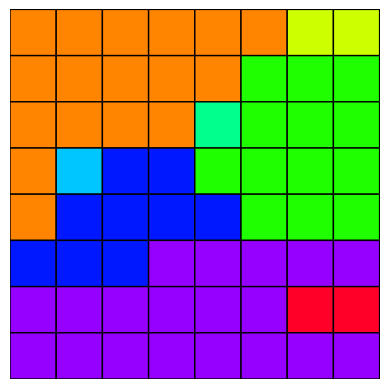

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

initial group cell count
group: 0, cell number: 17
group: 1, cell number: 2
group: 2, cell number: 13
group: 3, cell number: 1
group: 4, cell number: 1
group: 5, cell number: 9
group: 6, cell number: 19
group: 7, cell number: 2
final occupied group cell count
group: 0, cell number: 0
group: 1, cell number: 0
group: 2, cell number: 0
group: 3, cell number: 0
group: 4, cell number: 0
group: 5, cell number: 0
group: 6, cell number: 0
group: 7, cell number: 0
final empty group cell count
group: 0, cell number: 17
group: 1, cell number: 2
group: 2, cell number: 13
group: 3, cell number: 1
group: 4, cell number: 1
group: 5, cell number: 9
group: 6, cell number: 19
group: 7, cell number: 2


In [122]:
game.place((2, 4))
game.place((5, 3))
game.place((6, 5))
game.place((3, 2))
game.place((1, 6))
game.place((4, 8))
game.place((7, 1))
game.place((8, 7))

print(f'initial group cell count')
cell_count = [0 for i in range(board.num_groups)]
for r in board.grid:
    for c in r:
        cell_count[c.group] += 1
for i, c in enumerate(cell_count):
    print(f'group: {i}, cell number: {c}')

print(f'final occupied group cell count')
for i, g in enumerate(board.occupied_groups):
    print(f'group: {i}, cell number: {len(g)}')

print(f'final empty group cell count')
for i, g in enumerate(board.groups):
    print(f'group: {i}, cell number: {len(g)}')


In [120]:
board.in_board((5, 8), internal=True)

False

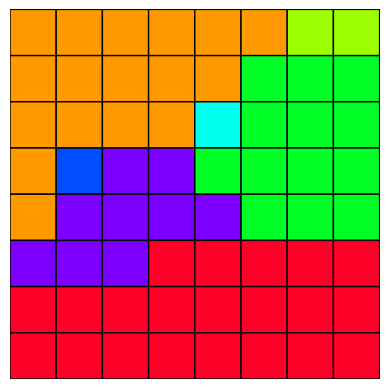

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

N = max(max(row) for row in loaded_board)  # maximum value in loaded_board
cmap_base = plt.get_cmap('gist_rainbow')
n_color = cmap_base.N

# Generate color indices for each value from 1 to N
color_indices = [(n_color / N) * v for v in range(1, N + 1)]
colors = [cmap_base(int(idx) % n_color) for idx in color_indices]

# Add color for 0 if needed (e.g., white or transparent)
# colors = [(1, 1, 1, 1)] + colors  # white for 0

custom_cmap = ListedColormap(colors)
fig, ax = plt.subplots()
ax.pcolor(loaded_board, cmap=custom_cmap, edgecolors='k', linewidths=1)
ax.set_axis_off()
ax.invert_yaxis()
ax.set_aspect('equal')
plt.show()

In [ ]:
def init_board(group_map):
    N = max(max(row) for row in group_map)  # maximum value in loaded_board
    cmap_base = plt.get_cmap('gist_rainbow')
    n_color = cmap_base.N
    # Generate color indices for each value from 1 to N
    color_indices = [(n_color / N) * v for v in range(1, N + 1)]
    colors = [cmap_base(int(idx) % n_color) for idx in color_indices]
    custom_cmap = ListedColormap(colors)
    fig, ax = plt.subplots()
    ax.pcolor(group_map, cmap=custom_cmap, edgecolors='k', linewidths=1)
    ax.set_axis_off()
    ax.invert_yaxis()
    ax.set_aspect('equal')
    return fig, ax


    

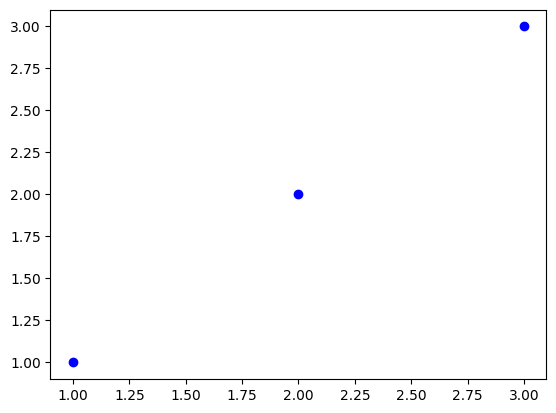

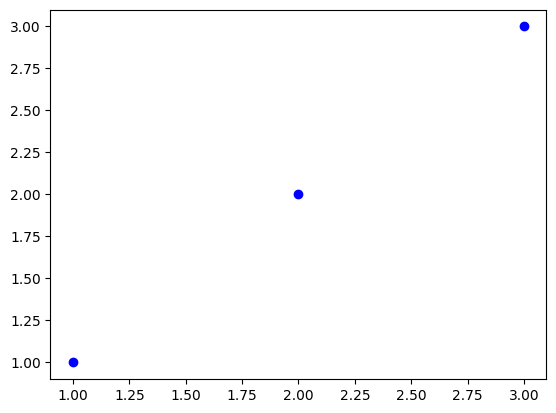

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

in_str = None
x = [1, 2, 3]
y = [1, 2, 3]

while in_str != 'Yes':
    in_str = input('Enter a string:')
    plt.clf()  # Clear the current figure
    if in_str == 'red':
        plt.scatter(x, y, c='red')
    else:
        plt.scatter(x, y, c='blue')
    clear_output(wait=True)
    display(plt.gcf())